In [1]:
import pandas as pd

file_path = 'combined data.csv'

# Load the CSV file into a DataFrame
combined_df = pd.read_csv(file_path)

In [2]:
print(combined_df.head())

   Transaction_ID     Name        Price  Side  Volume  Order_Executed  Target  \
0              17  1185321     300000.0     1   25804               0       0   
1              58   175018  112000000.0     1     107               0       0   
2              92   373019   12090000.0     1     900               0      90   
3              93  1094473      25000.0     0  500000               0       0   
4              96  1104249  195000000.0     0     100               0      90   

                         Date  Month     Day  Day_Num  Hour  Minute  Second  
0  2024-02-12 07:25:00.335536      2  Monday        2     7      25       0  
1  2024-02-12 07:25:00.359399      2  Monday        2     7      25       0  
2  2024-02-12 07:25:00.374240      2  Monday        2     7      25       0  
3  2024-02-12 07:25:00.375912      2  Monday        2     7      25       0  
4  2024-02-12 07:25:00.376684      2  Monday        2     7      25       0  


In [3]:
# Number of rows in combined_df
num_rows = len(combined_df)
print(f"Number of rows: {num_rows}")

Number of rows: 25697619


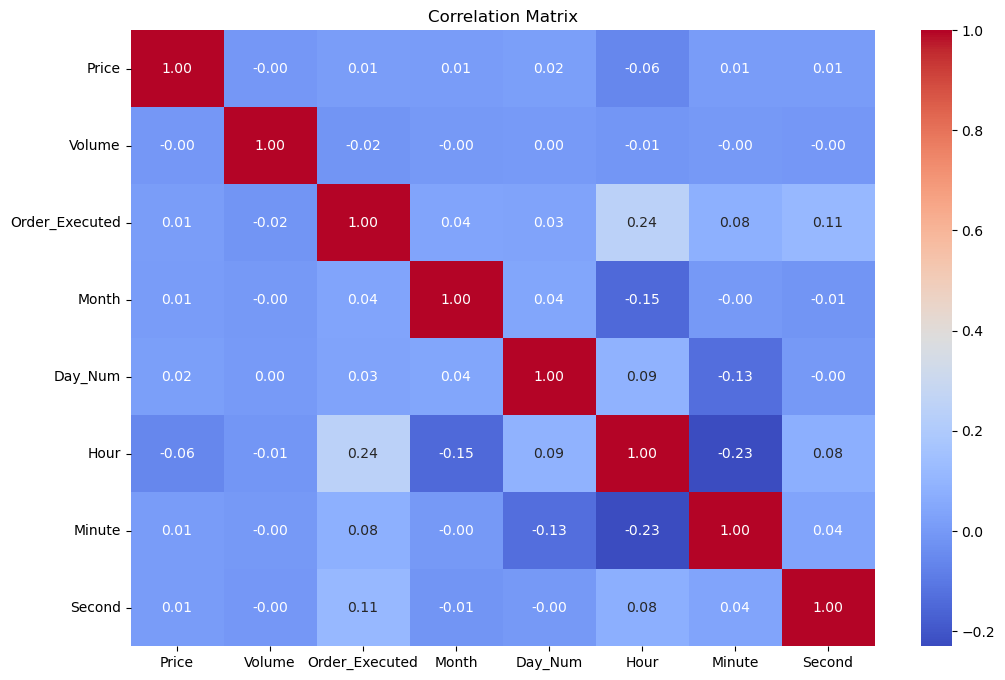

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
# Drop non-numeric columns for correlation matrix calculation
correlation_data = combined_df.drop(columns=['Transaction_ID', 'Name', 'Target', 'Side', 'Day'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

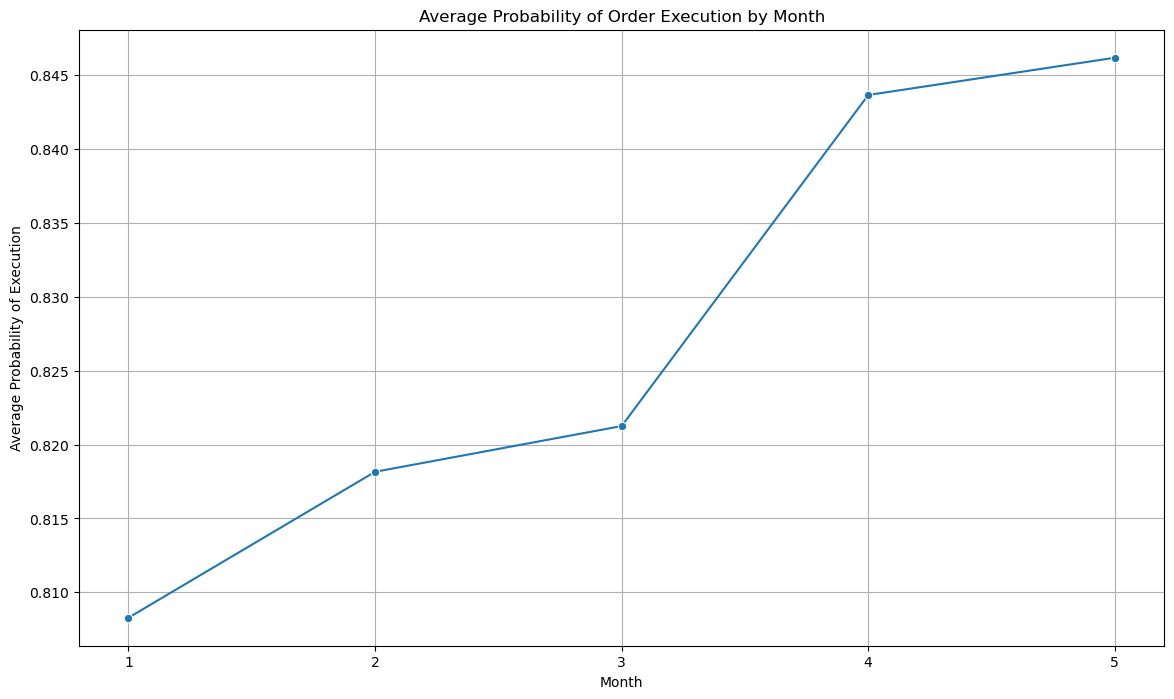

In [5]:
# Group by month and calculate mean probability of execution
monthly_data = combined_df.groupby('Month')['Order_Executed'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Order_Executed', data=monthly_data, marker='o')
plt.title('Average Probability of Order Execution by Month')
plt.xlabel('Month')
plt.ylabel('Average Probability of Execution')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

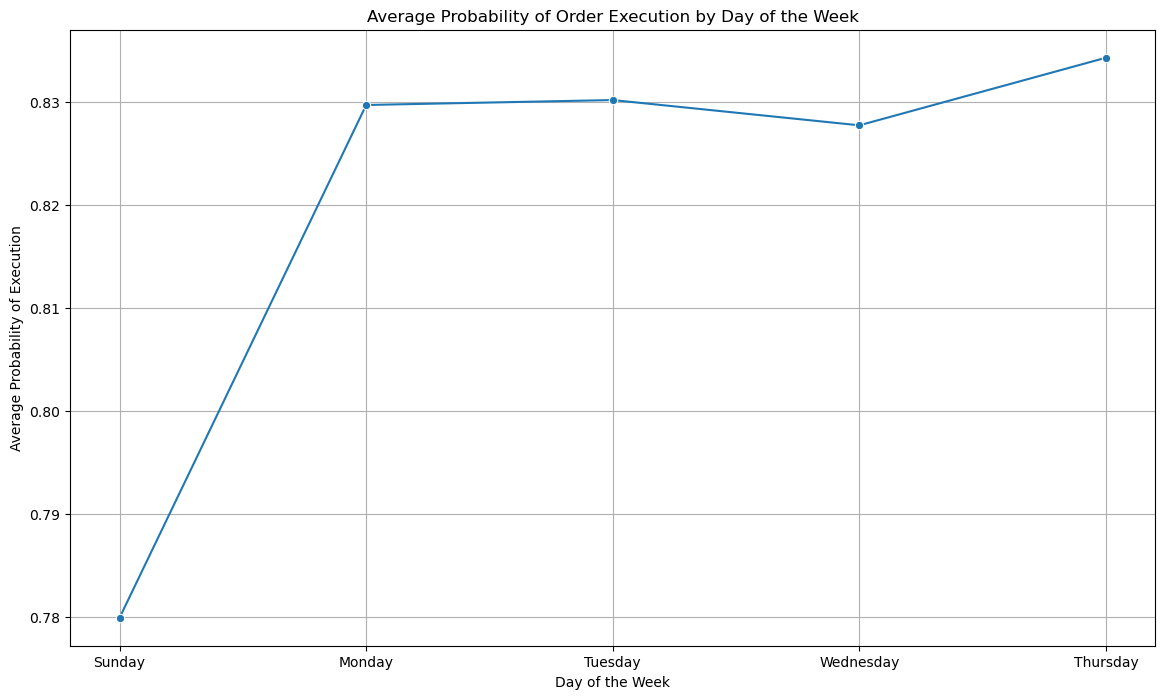

In [6]:
# Define the correct order for the days of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday']

# Group by day and calculate mean probability of execution
daily_data = combined_df.groupby('Day')['Order_Executed'].mean().reset_index()

# Convert 'Day' to a categorical type with the specified order for plotting
daily_data['Day'] = pd.Categorical(daily_data['Day'], categories=day_order, ordered=True)

# Sort the data by the categorical 'Day' column
daily_data = daily_data.sort_values('Day')

plt.figure(figsize=(14, 8))
sns.lineplot(x='Day', y='Order_Executed', data=daily_data, marker='o')
plt.title('Average Probability of Order Execution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Probability of Execution')
plt.grid(True)
plt.show()

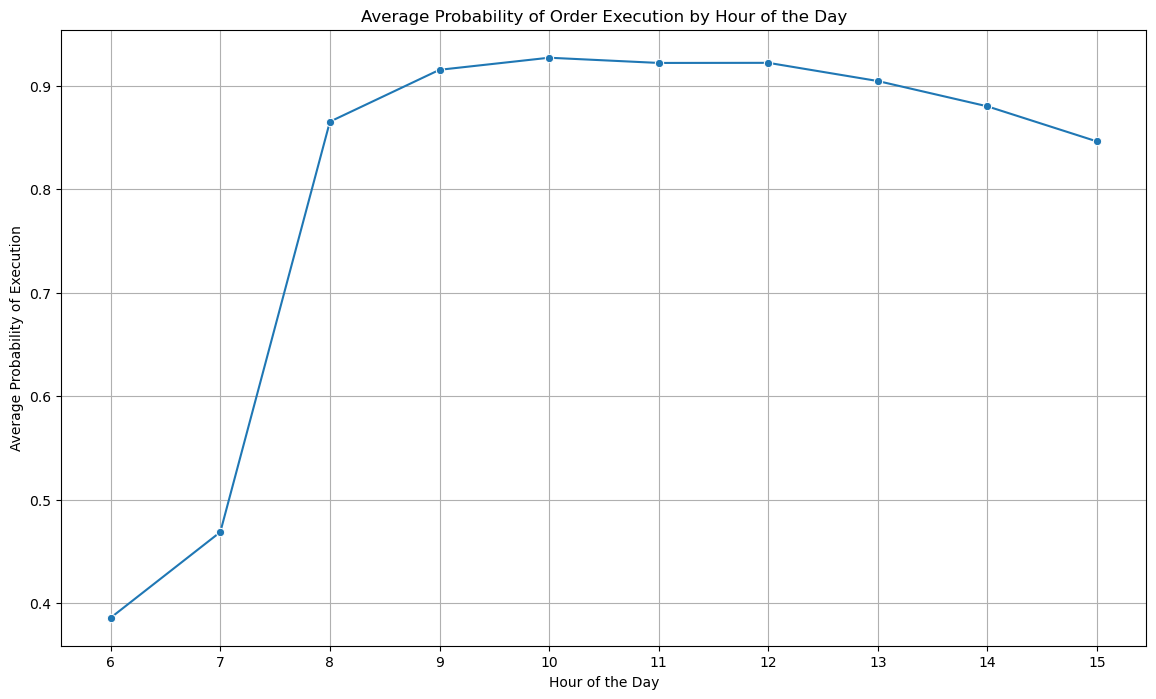

In [7]:
# Group by hour and calculate mean probability of execution
hourly_data = combined_df.groupby('Hour')['Order_Executed'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='Hour', y='Order_Executed', data=hourly_data, marker='o')
plt.title('Average Probability of Order Execution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Probability of Execution')
plt.xticks(range(6, 16))
plt.grid(True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Drop non-numeric columns 'Day' and 'Date'
combined_df = combined_df.drop(columns=['Day', 'Date'])

# Trying to predict if the order will be excecuted or not
X = combined_df.drop(columns=['Order_Executed'])
y = combined_df['Order_Executed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.963874864676184
